In [1]:
from google.colab import files
uploaded = files.upload()

Saving HR.csv to HR.csv


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import f_oneway, shapiro
import scipy.stats as st
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from matplotlib import colors
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
sns.set_style("whitegrid")
pd.options.display.max_colwidth = 18
pd.options.display.max_columns = 50
pio.templates.default = 'plotly_white'

In [3]:
hr = pd.read_csv('HR.csv')
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


В таблице представлены основные статистики для всех переменных. В частности для столбца time_spend_company:
среднее - 3.498
медиана - 3
мин/макс - 2/10
среднее отклонение - 1.46

In [5]:
hr.time_spend_company.mode()

0    3
Name: time_spend_company, dtype: int64

Мода в столбце time_spend_company равна 3



In [14]:
# Рассчитаем корреляционную матрицу для количественных переменных.
hr_map = hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']].corr()

<Axes: >

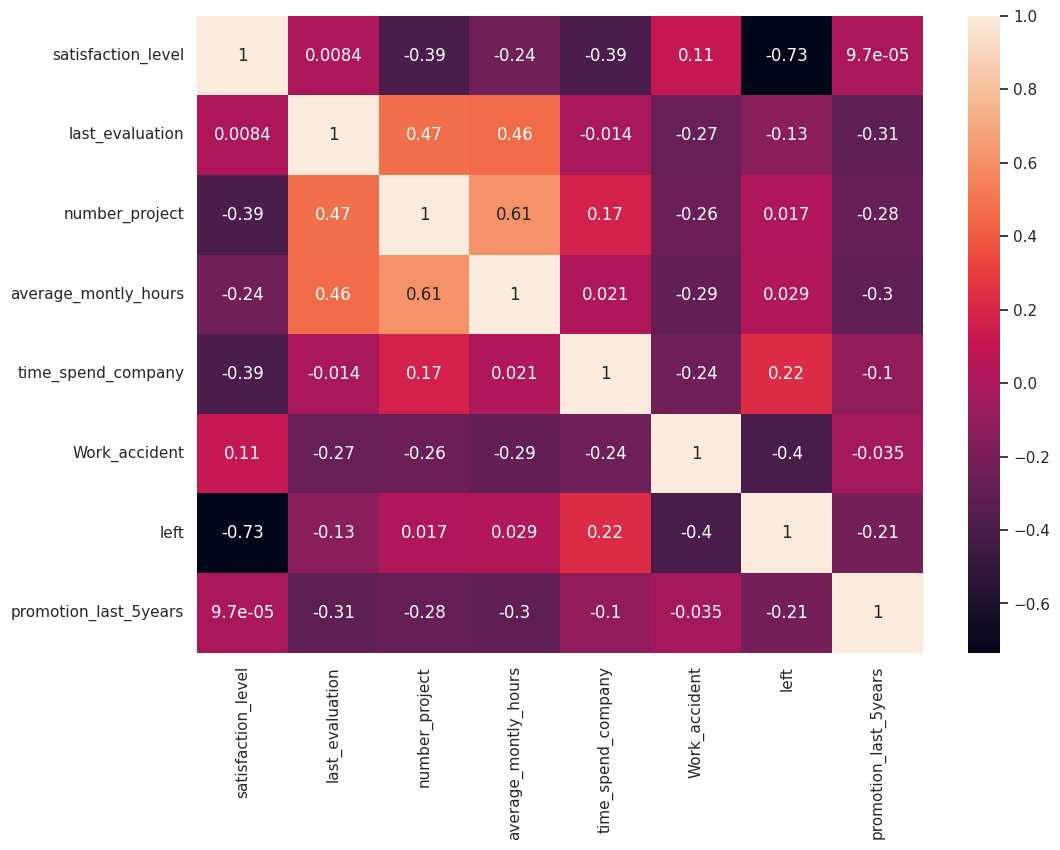

In [15]:
# визуализирую при помощи тепловой карты
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(hr_map.corr(), annot=True)

Наиболее положительно скоррелированные number_project и average_montly_hours. Коэфициент: 0.61

Наиболее отрицательно скоррелированные satisfaction_level и left. Коэфициент: (-0.73)

Наименее скоррелированные satisfaction_level и promotion_last_5years, так как их корреляция ближе всего к нулю: 0,000097.

In [ ]:
hr.department.value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

С помощью функции value_counts можем увидеть количество сотрудников в каждом департаменте.

In [ ]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Видим что пропуски отсутствуют

In [ ]:
hr[hr.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Видим что есть дублирующие строки, но не будем их удалять, так как у нас нет ID сотрудников. Следовательно нельзя быть полностью уверенным, что это именно повторы строк.

In [ ]:
# при необходимости можно удалить с помощью функции drop_duplicates()
hr_drop = hr.drop_duplicates()
hr_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [ ]:
hr.average_montly_hours.describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

Посмотрим на статистики столбца average_montly_hours

In [ ]:
av_monthly_h = hr.average_montly_hours
av_monthly_h

0        157
1        262
2        272
3        223
4        159
        ... 
14994    151
14995    160
14996    143
14997    280
14998    158
Name: average_montly_hours, Length: 14999, dtype: int64

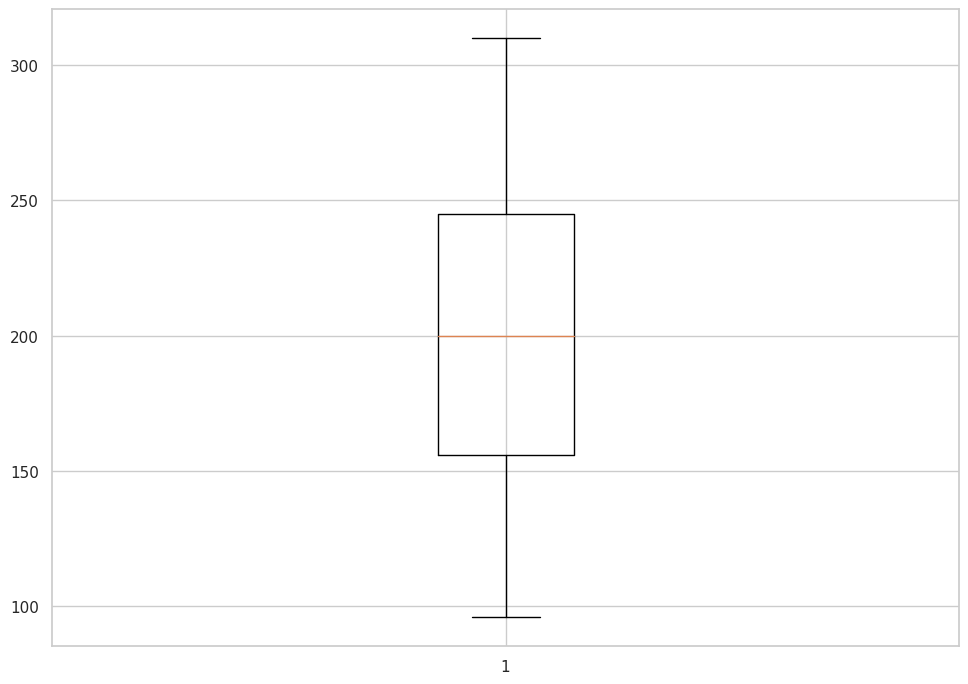

In [ ]:
# построим ящиковую диаграмму
plt.boxplot(av_monthly_h);

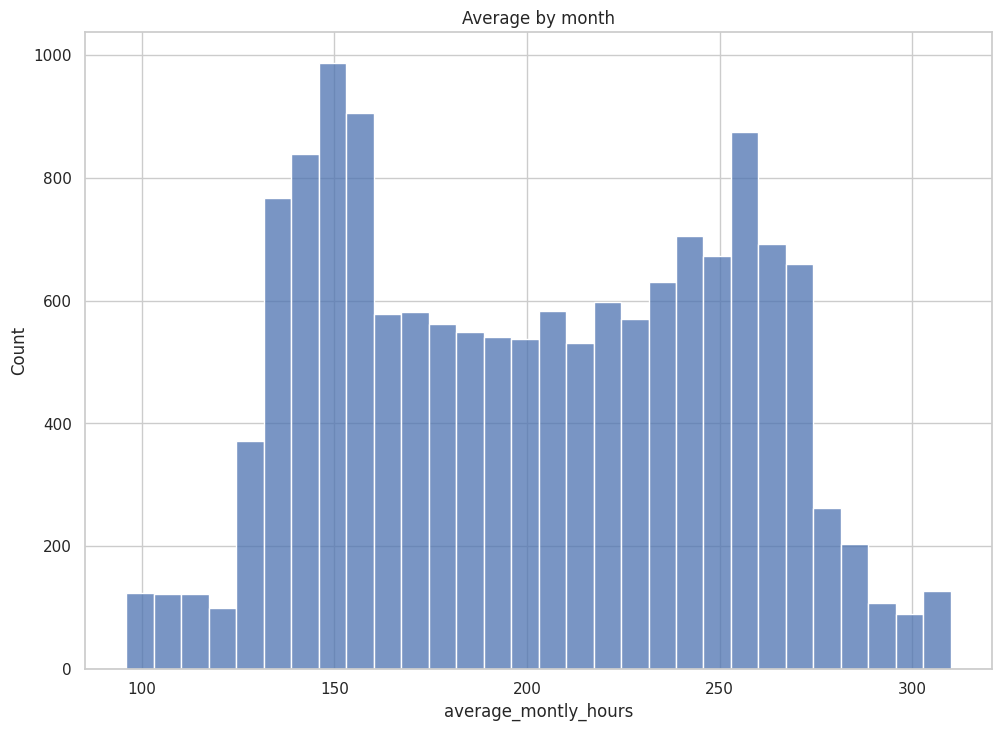

In [ ]:
# визуализируем распределение с помощью гистограммы
sns.histplot(hr.average_montly_hours)
plt.title('Average by month')
plt.show()

Максимальное количество часов в неделю - 310 довольно большое, но нельзя сказать точно сказать что это выброс.

In [ ]:
# raspred sotrud po zp
hr.salary.value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

С помощью функции value_counts можем увидеть распределение сотрудников по зарплате

In [ ]:
hr.groupby(['department', 'salary']).count()

satisfaction_level  last_evaluation  number_project  \
department  salary                                                        
IT          high                    83               83              83   
            low                    609              609             609   
            medium                 535              535             535   
RandD       high                    51               51              51   
            low                    364              364             364   
            medium                 372              372             372   
accounting  high                    74               74              74   
            low                    358              358             358   
            medium                 335              335             335   
hr          high                    45               45              45   
            low                    335              335             335   
            medium                 359              359             359   
management  high                   225              225             225   
            low                    180              180             180   
            medium                 225              225             225   
marketing   high                    80               80              80   
            low                    402              402             402   
            medium                 376              376             376   
product_mng high                    68               68              68   
            low                    451              451             451   
            medium                 383              383             383   
sales       high                   269              269             269   
            low                   2099             2099            2099   
            medium                1772             1772            1772   
support     high                   141              141             141   
            low                   1146             1146            1146   
            medium                 942              942             942   
technical   high                   201              201             201   
            low                   1372             1372            1372   
            medium                1147             1147            1147   

                    average_montly_hours  time_spend_company  Work_accident  \
department  salary                                                            
IT          high                      83                  83             83   
            low                      609                 609            609   
            medium                   535                 535            535   
RandD       high                      51                  51             51   
            low                      364                 364            364   
            medium                   372                 372            372   
accounting  high                      74                  74             74   
            low                      358                 358            358   
            medium                   335                 335            335   
hr          high                      45                  45             45   
            low                      335                 335            335   
            medium                   359                 359            359   
management  high                     225                 225            225   
            low                      180                 180            180   
            medium                   225                 225            225   
marketing   high                      80                  80             80   
            low                      402                 402            402   
            medium                   376                 376            376   
product_mng high                      6

С помощью функции count можем посчитать распределение сотрудников по зарплате в каждом департаменте по отдельности

In [16]:
high_salary = hr.loc[hr['salary']=='high']['average_montly_hours'].values
high_salary

array([149, 289, 156, ..., 159, 131, 238])

In [17]:
low_salary = hr.loc[hr['salary']=='low']['average_montly_hours'].values
low_salary

array([157, 223, 159, ..., 143, 280, 158])

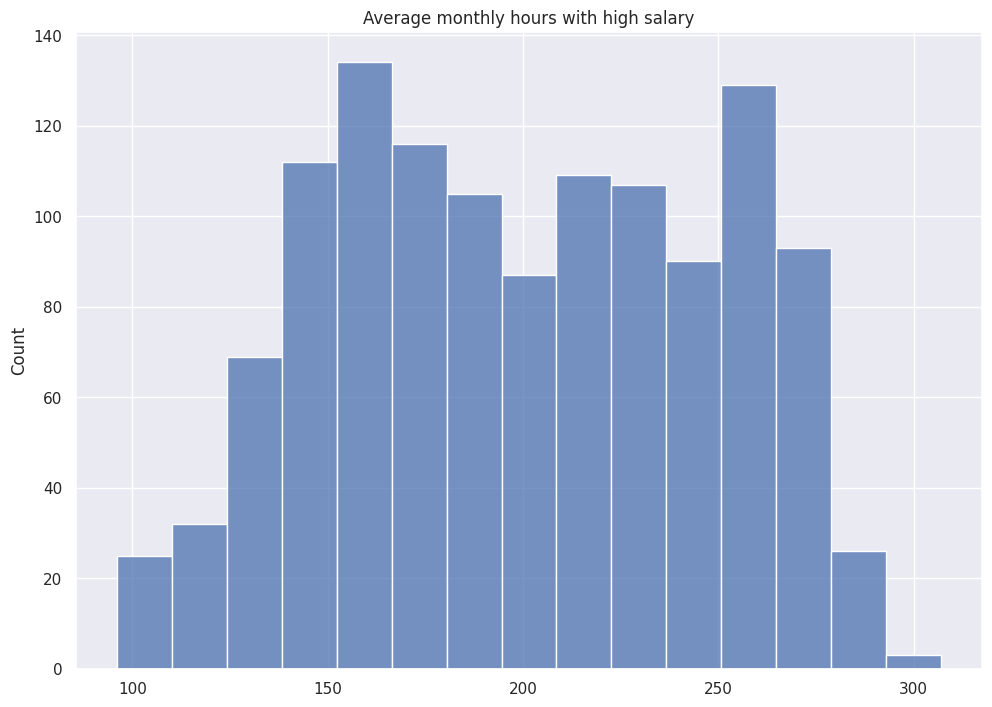

In [21]:
# визуализируем распределение с помощью гистограммы
sns.histplot(high_salary)
plt.title('Average monthly hours with high salary')
plt.show()

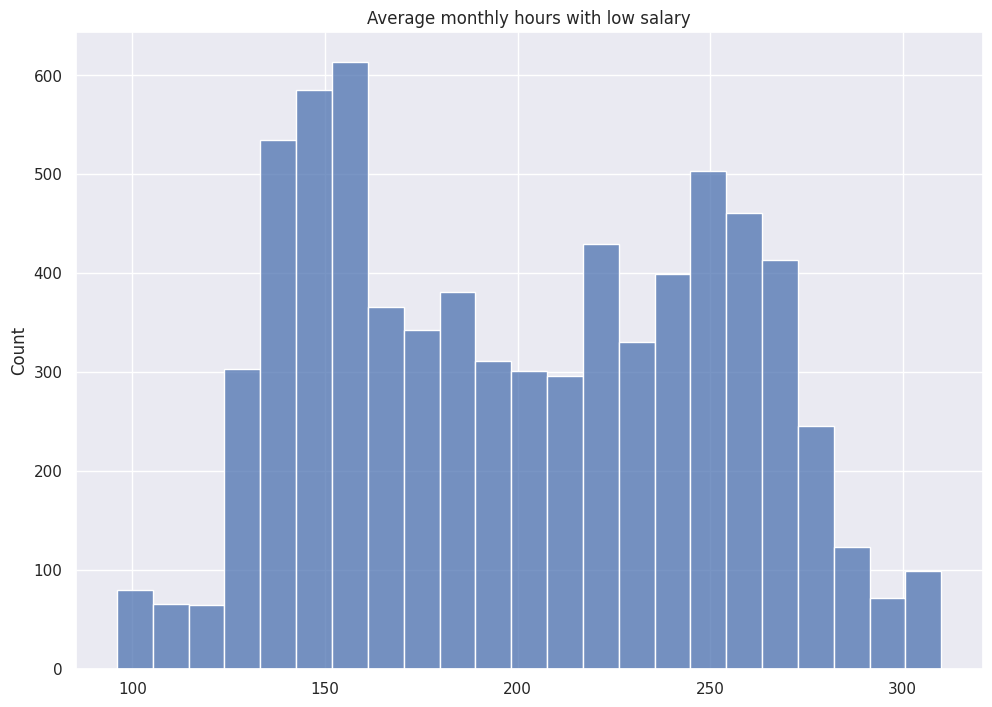

In [22]:
# визуализируем распределение с помощью гистограммы
sns.histplot(low_salary)
plt.title('Average monthly hours with low salary')
plt.show()

In [23]:
# проверим распределение на нормальность
stat, p = st.shapiro(high_salary)
print(f"Статистика = {stat:.5f}, p = {p:.5f}")
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

Статистика = 0.97121, p = 0.00000
Вероятно не нормальное распределение


In [24]:
stat, p = st.shapiro(low_salary)
print(f"Статистика = {stat:.5f}, p = {p:.5f}")
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

Статистика = 0.95986, p = 0.00000
Вероятно не нормальное распределение


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


В обоих случаях не нормальное распределение

In [25]:
stat, p = st.mannwhitneyu(high_salary, low_salary)
print(f"Статистика = {stat:.5f}, p = {p:.5f}")
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 4507096.50000, p = 0.82413
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


С помощью рассчитанного критерия Манна-Уитни видим, что отсутствует статистически значимая разница в количестве времени, проведенного на работе сотрудниками с высоким окладом и с низким окладом. То есть сотрудники с высоким окладом проводят на работе не больше времени, чем сотрудники с низким окладом.

In [26]:
left_employee = hr.loc[hr['left']==1]
left_employee

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [27]:
left_employee.promotion_last_5years.value_counts(normalize=True)

promotion_last_5years
0    0.994679
1    0.005321
Name: proportion, dtype: float64

Доля уволившихся сотрудников с повышением равна 0.5%

In [28]:
stay_employee = hr.loc[hr['left']==0]
stay_employee

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [29]:
stay_employee.promotion_last_5years.value_counts(normalize=True)

promotion_last_5years
0    0.973749
1    0.026251
Name: proportion, dtype: float64

Среди не уволившихся сотрудников доля с повышением равна 2.6%

In [30]:
left_employee.satisfaction_level.mean()

0.4400980117614114

Среди уволившихся сотрудников уровень удовлетворенности равен 0.44

In [31]:
stay_employee.satisfaction_level.mean()

0.666809590479524

Среди не уволившихся сотрудников уровень удовлетворенности равен 0.66

In [ ]:
left_employee.number_project.mean()

3.8555026603192384

Среди уволившихся сотрудников среднее количество проектов равно 4

In [ ]:
stay_employee.number_project.mean()

3.786664333216661

Среди не уволившихся сотрудников среднее количество проектов равно 4

In [32]:
hr_predict = hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']]
hr_predict

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [33]:
hr_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 937.6 KB


In [34]:
hr_predict.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
# закодируем столбец left с помощью LabelEncoder
le = LabelEncoder()
hr_predict.loc[:, 'left'] = le.fit_transform(hr_predict.loc[:, 'left'])

In [ ]:
hr_predict_left = hr_predict['left'].tolist()
hr_predict_left

In [38]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hr_predict, hr_predict_left, test_size=0.2, random_state=42)

In [39]:
len(X_train)

11999

In [40]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [41]:
# Создаем экземпляр класса. Это традиционно делается на дефолтных параметрах
lda = LinearDiscriminantAnalysis()

In [42]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [43]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
# смотрим разницу факта и прогноза
# функция Т помогает выводить в столбик
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [45]:
result

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
2995,0,0
2996,0,0
2997,0,0
2998,0,0


In [46]:
# оценим качество модели с помощью метрики точности
# расчет точности - отношение верных прогнозов к общему количеству позиций

from sklearn.metrics import accuracy_score

In [47]:
# подставляем в качестве параметров правильные ответы и ответы, предсказанные моделью
accuracy_score(y_test, lda.predict(X_test))

0.7533333333333333

Точность прогноза равна 75%